In [155]:
import pandas as pd
!pip install -U pandasql
from pandasql import sqldf

Requirement already up-to-date: pandasql in /usr/local/lib/python3.6/dist-packages (0.7.3)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [141]:
#importing data

data=pd.read_csv('gdrive/My Drive/Data Set.txt',sep="\t",encoding = 'utf-16'
            ,names=["customerid","orderId","yyyymmdd","pickuplocation_lat","pickuplocation_lng","droplocation_lat",
                                    "droplocation_lng","subtotal","surge"])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **EDA**

In [142]:
data = data.iloc[1:]

In [143]:
data.head()

,customerid,orderId,yyyymmdd,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,subtotal,surge
1,182cefbc1000000,RD500000001,20201130,26.11647987,91.72194672,26.17539024,91.77307129,114,18.82
2,d4cd2fa51000001,RD500000002,20201130,26.16446475,91.7379152,26.1571672,91.6912431,0,NaN
3,ff315fa91000002,RD500000003,20201130,26.15999297,91.68274418,26.1579487,91.7716225,115,18.97
4,d4cd2fa51000001,RD500000004,20201130,26.16441389,91.73664719,26.1571672,91.6912431,57,9.41
5,182cefbc1000000,RD500000005,20201130,26.1164805,91.7219495,26.1753906,91.7730715,114,18.82


In [144]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537968 entries, 1 to 537968
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   customerid          537968 non-null  object
 1   orderId             537968 non-null  object
 2   yyyymmdd            537968 non-null  object
 3   pickuplocation_lat  537968 non-null  object
 4   pickuplocation_lng  537968 non-null  object
 5   droplocation_lat    537965 non-null  object
 6   droplocation_lng    537965 non-null  object
 7   subtotal            537960 non-null  object
 8   surge               504318 non-null  object
dtypes: object(9)
memory usage: 36.9+ MB


In [145]:
## changing lat, long and fares -subtotal and surge to float values
data['pickuplocation_lat']=pd.to_numeric(data['pickuplocation_lat'])
data['pickuplocation_lng']=pd.to_numeric(data['pickuplocation_lng'])
data['droplocation_lat']=pd.to_numeric(data['droplocation_lat'])
data['droplocation_lng']=pd.to_numeric(data['droplocation_lng'])
data['subtotal']=pd.to_numeric(data['subtotal'])
data['surge']=pd.to_numeric(data['surge'])


In [146]:
##description of data
data.describe()

,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,subtotal,surge
count,537968.000000,537968.000000,537965.000000,537965.000000,537960.000000,504318.000000
mean,26.156753,91.769602,26.157185,91.768401,44.810190,1.598761
std,0.070957,0.169599,0.037420,0.083548,26.821464,3.527428
min,-18.142353,-16.679912,12.959388,70.066031,0.000000,0.000000
25%,26.139098,91.752296,26.139164,91.750954,31.000000,0.000000
50%,26.159117,91.774643,26.160004,91.773087,39.000000,0.000000
75%,26.175751,91.790288,26.176632,91.789689,54.000000,0.000000
max,28.514013,94.891169,28.494531,94.909240,681.000000,66.690000


In [86]:
#remove subtotal 0 as fare can't be 0, also surge has null values

data = data.loc[(data['subtotal'] > 0)]


In [60]:
#top 100 coordinate distance based on subtotal+surge/distance

In [147]:
#Calculating Distance for Pick up and Drop locations

In [148]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 6371 is Radius of earth in kilometers.
    return km

data['distance'] = haversine_np(data['pickuplocation_lat'], data['pickuplocation_lng'], data['droplocation_lat'] , data['droplocation_lng'])

In [149]:
data.head()

,customerid,orderId,yyyymmdd,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,subtotal,surge,distance
1,182cefbc1000000,RD500000001,20201130,26.116480,91.721947,26.175390,91.773071,114.0,18.82,5.688301
2,d4cd2fa51000001,RD500000002,20201130,26.164465,91.737915,26.157167,91.691243,0.0,NaN,5.189758
3,ff315fa91000002,RD500000003,20201130,26.159993,91.682744,26.157949,91.771622,115.0,18.97,9.882821
4,d4cd2fa51000001,RD500000004,20201130,26.164414,91.736647,26.157167,91.691243,57.0,9.41,5.048762
5,182cefbc1000000,RD500000005,20201130,26.116480,91.721949,26.175391,91.773072,114.0,18.82,5.688015


In [150]:
data.describe()

,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,subtotal,surge,distance
count,537968.000000,537968.000000,537965.000000,537965.000000,537960.000000,504318.000000,537965.000000
mean,26.156753,91.769602,26.157185,91.768401,44.810190,1.598761,3.005648
std,0.070957,0.169599,0.037420,0.083548,26.821464,3.527428,16.618212
min,-18.142353,-16.679912,12.959388,70.066031,0.000000,0.000000,0.000000
25%,26.139098,91.752296,26.139164,91.750954,31.000000,0.000000,1.036649
50%,26.159117,91.774643,26.160004,91.773087,39.000000,0.000000,2.196933
75%,26.175751,91.790288,26.176632,91.789689,54.000000,0.000000,4.027438
max,28.514013,94.891169,28.494531,94.909240,681.000000,66.690000,12007.360365


In [152]:
#remove 0 distance and greater than 100 as ideally a trip >100km is not possible
data = data.loc[(data['distance'] > 0) & (data['distance'] <100)]

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537095 entries, 1 to 537968
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customerid          537095 non-null  object 
 1   orderId             537095 non-null  object 
 2   yyyymmdd            537095 non-null  object 
 3   pickuplocation_lat  537095 non-null  float64
 4   pickuplocation_lng  537095 non-null  float64
 5   droplocation_lat    537095 non-null  float64
 6   droplocation_lng    537095 non-null  float64
 7   subtotal            537087 non-null  float64
 8   surge               503538 non-null  float64
 9   distance            537095 non-null  float64
dtypes: float64(7), object(3)
memory usage: 45.1+ MB


In [154]:
data.describe()

,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,subtotal,surge,distance
count,537095.000000,537095.000000,537095.000000,537095.000000,537087.000000,503538.000000,5.370950e+05
mean,26.156835,91.769806,26.157186,91.768401,44.852808,1.600161,2.988160e+00
std,0.037261,0.083128,0.037438,0.083602,26.821065,3.529561,2.879804e+00
min,12.969963,70.046279,12.959388,70.066031,0.000000,0.000000,6.521343e-08
25%,26.139099,91.752296,26.139164,91.750946,31.000000,0.000000,1.041478e+00
50%,26.159119,91.774645,26.160009,91.773087,39.000000,0.000000,2.201156e+00
75%,26.175749,91.790288,26.176630,91.789689,54.000000,0.000000,4.030982e+00
max,28.514013,94.891169,28.494531,94.909240,681.000000,66.690000,3.709595e+01


**Question 1. Assume that you are a captain and you have a max limit of
100 rides a month that you can do. Looking at this data, what
geographical combinations would you target to do these 100 rides, so
that you can maximise your earnings ? How would you distribute the 100?**

1. As a captain, I will look at geographic pick up locations where the Total fare per distance covered is high, i.e. (Subtotal+surge)/Distance is higher
2. Also,Will choose the locations closer to each other among these top 100 locations

In [157]:
#getting the top 100 pickup points based on fares per km in descending order, i.e the distance covered by captain is less and the fare is more, hence more profitable
#distance>200m is considered
pickup=sqldf("select distinct pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng, avg(subtotal+surge) as fare,avg(distance)  as dist,avg(subtotal+surge)/avg(distance) as fareperkm from data where distance >0.2 group by 1,2,3,4 order by 7 desc limit 100")

In [158]:
pickup.describe()

,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,fare,dist,fareperkm
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26.153388,91.768330,26.158668,91.768279,127.479750,0.253675,498.963819
std,0.027759,0.028123,0.035404,0.028095,47.381186,0.067890,89.712585
min,26.111547,91.673821,26.106590,91.671301,85.000000,0.200023,424.533924
25%,26.124632,91.753273,26.116958,91.752363,103.790000,0.216910,445.972086
50%,26.162597,91.774094,26.177397,91.774408,114.000000,0.237913,469.838498
75%,26.180668,91.789461,26.187016,91.789428,125.627500,0.268309,509.871712
max,26.204397,91.820863,26.206793,91.818946,421.000000,0.673241,966.921403


In [122]:
#geohashes for top 100 pickup locations
!pip install pygeohash

  Created wheel for pygeohash: filename=pygeohash-1.2.0-py2.py3-none-any.whl size=6162 sha256=8a5a641affff6915c8960f8c2bb0fe54fc50cd31885befbe522d51b95f956eaf
  Stored in directory: /root/.cache/pip/wheels/3f/5f/14/989d83a271207dda28232746d63e737a2dbd88ea7f7a9db807
Successfully built pygeohash


In [159]:
import pygeohash as gh

In [160]:
pickup['geohash']=pickup.apply(lambda x: gh.encode(x.pickuplocation_lat, x.pickuplocation_lng, precision=5), axis=1)


In [161]:
pickup

,pickuplocation_lat,pickuplocation_lng,droplocation_lat,droplocation_lng,fare,dist,fareperkm,geohash
0,26.166009,91.746616,26.206289,91.744770,238.35,0.246504,966.921403,wh9hz
1,26.179235,91.739844,26.206793,91.741701,172.00,0.226462,759.508495,wh9hz
2,26.202071,91.693548,26.157322,91.692061,167.82,0.221301,758.334306,wh9jn
3,26.115257,91.722771,26.198191,91.723389,214.54,0.285676,750.990436,wh9hx
4,26.115257,91.722770,26.198191,91.723390,214.54,0.285731,750.844782,wh9hx
...,...,...,...,...,...,...,...,...
95,26.169897,91.763368,26.131676,91.761871,90.32,0.211641,426.759425,wh9kb
96,26.186987,91.741691,26.126488,91.742412,93.68,0.219639,426.517195,wh9hz
97,26.181840,91.801928,26.128624,91.801268,85.00,0.200023,424.951319,wh9kc
98,26.137557,91.800053,26.190600,91.801800,114.01,0.268536,424.561428,wh9k8


**Question 2. Find week-on-week retention cohorts for surged customers
The dataset contains the orders for a month. Looking at this dataset, can you attempt to answer the following questions-**

**1. For surged customers, can we find the week-on-week percentage of customers who came
back to take a ride?**

In [162]:
##converting date string to datetime
data['yyyymmdd'] = pd.to_datetime(data['yyyymmdd'],format='%Y%m%d')



In [163]:
data['yyyymmdd']

1        2020-11-30
2        2020-11-30
3        2020-11-30
4        2020-11-30
5        2020-11-30
            ...    
537964   2020-11-01
537965   2020-11-01
537966   2020-11-01
537967   2020-11-01
537968   2020-11-01
Name: yyyymmdd, Length: 537095, dtype: datetime64[ns]

Retention Calculation -Surged Customers

1. Week 1 to Week 4 have been considered from 1st Nov 2020 to 28th nov 2020, with a gap of 7 days as per data


In [127]:
##getting login weeks for all surged customers
login=sqldf("select distinct case when yyyymmdd <='2020-11-07' then 'week1' when (yyyymmdd >'2020-11-07' and yyyymmdd<='2020-11-14')  then 'week2' when (yyyymmdd >'2020-11-14' and yyyymmdd<='2020-11-21')  then 'week3' when (yyyymmdd >'2020-11-21' and yyyymmdd<='2020-11-28')  then 'week4' end as week,customerid as cust from data where surge>0 and surge is not null and yyyymmdd <='2020-11-28' ")

In [128]:
login.head()

,week,cust
0,week4,0284d4e91011204
1,week4,936edc1d1015272
2,week4,c17899491011125
3,week4,4773cb6a1015277
4,week4,615bfcea1015278


In [129]:
##getting first week as well as all login weeks for surged customers
base=sqldf("Select a.*,b.week from (SELECT distinct cust,min(week) as firstweek FROM login group by 1)a inner join login b on a.cust=b.cust order by 1 desc")

In [130]:
base.head()

,cust,firstweek,week
0,fffe3e301035882,week4,week4
1,fffa4f1a1059892,week3,week3
2,fff9c5c91060903,week2,week2
3,fff63e0e1017528,week1,week4
4,fff63e0e1017528,week1,week2


In [131]:
##getting the final cohort retention table week 1 to week 4 for surged customers
cohort=sqldf("select firstweek,sum(case when week='week1' then 1 else 0 end) as week_1,sum(case when week='week2' then 1 else 0 end) as week_2,sum(case when week='week3' then 1 else 0 end) as week_3,sum(case when week='week4' then 1 else 0 end) as week_4 from base group by 1")

In [132]:
cohort

,firstweek,week_1,week_2,week_3,week_4
0,week1,8422,3188,1968,1963
1,week2,0,14689,2381,2435
2,week3,0,0,6444,1083
3,week4,0,0,0,7201


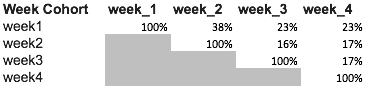

Retention Rates Without Surge

In [133]:
login2=sqldf("select distinct case when yyyymmdd <='2020-11-07' then 'week1' when (yyyymmdd >'2020-11-07' and yyyymmdd<='2020-11-14')  then 'week2' when (yyyymmdd >'2020-11-14' and yyyymmdd<='2020-11-21')  then 'week3' when (yyyymmdd >'2020-11-21' and yyyymmdd<='2020-11-28')  then 'week4' end as week,customerid as cust from data where (surge =0 or surge is null )and yyyymmdd <='2020-11-28' ")

In [137]:
base2=sqldf("Select a.*,b.week from (SELECT distinct cust,min(week) as firstweek FROM login2 group by 1)a inner join login2 b on a.cust=b.cust order by 1 desc")

In [138]:
cohort2=sqldf("select firstweek,sum(case when week='week1' then 1 else 0 end) as week_1,sum(case when week='week2' then 1 else 0 end) as week_2,sum(case when week='week3' then 1 else 0 end) as week_3,sum(case when week='week4' then 1 else 0 end) as week_4 from base2 group by 1")

In [139]:
cohort2

,firstweek,week_1,week_2,week_3,week_4
0,week1,27968,12742,10312,10286
1,week2,0,19124,5300,5092
2,week3,0,0,13767,3807
3,week4,0,0,0,13205


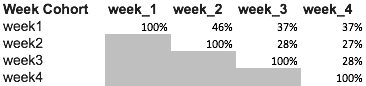

**2. Does surge have a negative impact on retention of customers ? What data would you look
at to attempt to answer this question ? Can you support your answer with relevant data that
you looked at ?**

From the cohort1 and cohort 2 tables, We can see that the Surge pricing has had a negative impact on the Week on Week Retention rates, nearly **14% dip** in Week4 Retention rate for Week 1 Cohort

# **Question 3. How do I set up the experiment, if I want to test the following hypothesis Hypothesis: Suppose we have a pricing algorithm that suggests that we want to surge a particular geographic location by flat 20%**

Sol :
We should start an experiment - For HSR Layout -surge the prices by flat 20%

**Null Hypothesis** - There is no impact by this change
**Alternate Hypothesis** - Demand will drop but as the ticket size is high, the overall revenue will go up

*Assumption* - Similar external conditions in both Test and Control groups

1. We can conduct an experiment wherein we surge the prices by flat 20% at HSR Layout for a week (to cover all days -weekdays/weekends) without any other campaign/experiments going on at the same time so that the results are not biased- Test Group

2. We would have the data for prior weeks when there was no such experiment and the following week ,this could be our Control Group

3. We shall then compare the performances for the Test and Control Group

## **Question 4. Was the experiment successful?**

4. Metrics to be considered - At HSR Layout - 
- Bookings per day for each day of the week
- Bookings at different times of the day
- Gross Revenue owing to the trips
- Regular/Frequent Customers Behaviour or Behaviour across Customer segments
- Sessions per day
- Avg Captain waiting time
- Cancellations per day

Similar metrics for other places, can also be seen to see if the change has has any impact 

5. Measurement - Perform Statistical Tests to see if the difference is significant enough to reject the null hypothesis. Look at the p values and Confidence intervals. If the overall revenue has been higher with the experiment, we can proceed with this at other similar places also(similar to HSR Layout) 